<a href="https://colab.research.google.com/github/Vidhuran-Rajendran/Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

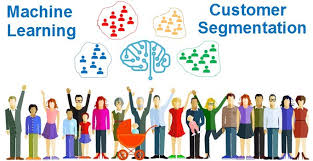

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>
# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Architecture

Data Preparation and Exploratory Data Analysis > Build Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from numpy import math
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file="/content/drive/MyDrive/Colab Notebooks/ALma better/Capstone project/Customer Segmetation cap_4/Online Retail.xlsx"
data1=pd.read_excel(file)
data=data1.copy()

# Data Inspection

In [6]:
# First Look
data.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

In [7]:
data.tail

<bound method NDFrame.tail of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

In [8]:
data.shape

(541909, 8)

In [9]:
## Dataset Information(Dtype ,Null count, Non-null count)
data.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [10]:
# Descriptive summary of dataset
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- The max and min value of Quantity are both 80995; it could represent a reversal of data entry.
- Negative UnitPrice It is uncommon to have negative UnitPrice, as this would mean a cash outflow to a company. 

In [11]:
# Looking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- Missing 25% of CustomerID.
- Missing 0.3% of description.

In [14]:
def show_missing():
  missing=data.columns[data.isnull().any()].tolist()
  return missing

# missing data counts and percentages
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending=False))
print('__'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending= False)/len(data)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
____________________________________________________________________________________________________
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [17]:
# Looking for UNique values
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# Handling Missing Values

In [19]:
# Dropping missing values
data=data[pd.notnull(data['CustomerID'])]
data=data[pd.notnull(data['Description'])]
data['InvoiceNo']=data['InvoiceNo'].astype('str')
data=data[~data['InvoiceNo'].str.contains('C')]

In [20]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# EDA and Data Preprocessing

# 1.Stockcode

In [21]:
stockcode_data=data['StockCode'].value_counts().reset_index()
stockcode_data.rename(columns={'index':'StockCode_Name'},inplace=True)
stockcode_data.rename(columns={'StockCode':'Count'},inplace=True)
stockcode_data.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


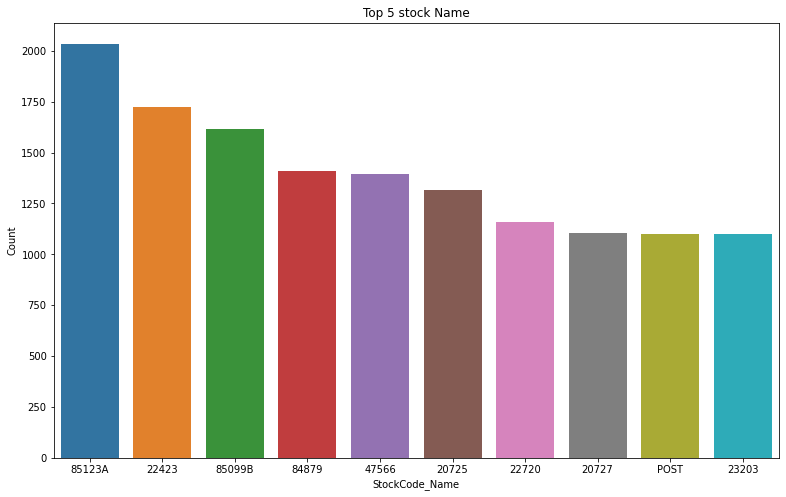

In [24]:
plt.figure(figsize=(13,8))
plt.title('Top 5 stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=stockcode_data[:10])

### 2.**Invoice Date**

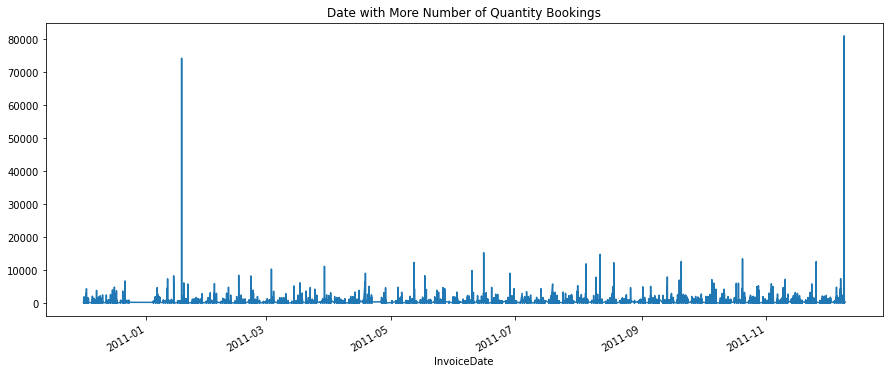

In [25]:
data.groupby('InvoiceDate')['Quantity'].sum().plot.line(figsize=(15,6))
plt.title('Date with More Number of Quantity Bookings')
plt.show()

### 3.**Country**

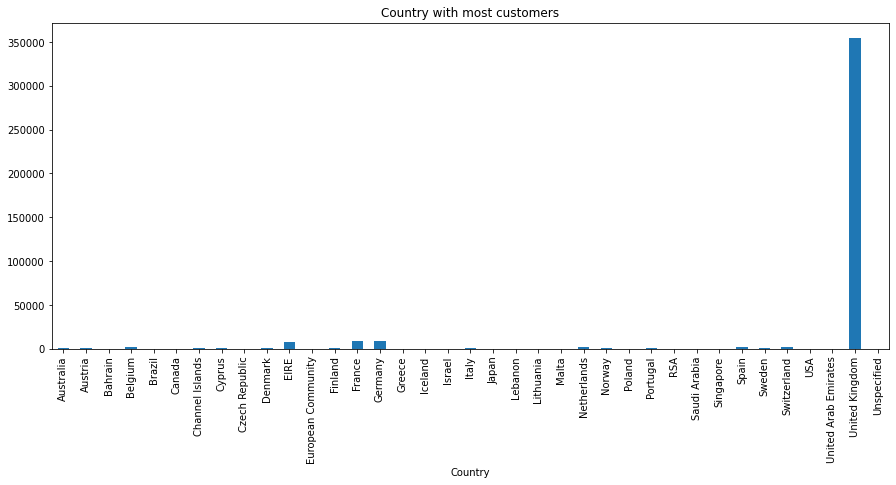

In [26]:
data.groupby('Country').count()['CustomerID'].plot.bar(figsize=(15,6))
plt.title('Country with most customers')
plt.show()

## **Extracting Features from Datetime**

In [27]:
from datetime import datetime
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['Month']=data['InvoiceDate'].dt.month
data['Day']=data['InvoiceDate'].dt.day
data['Hour']=data['InvoiceDate'].dt.hour

### **Hourly Sale**s

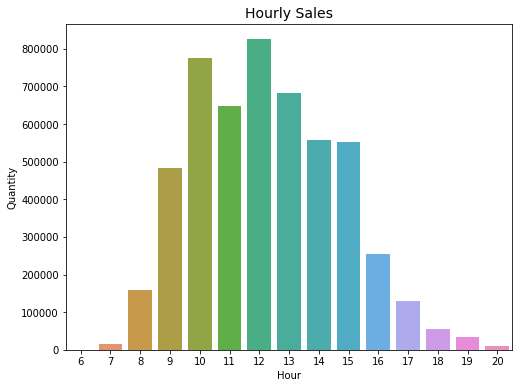

In [28]:
hourly_sales = data[['Hour', 'Quantity']].groupby('Hour').sum()
plt.figure(figsize=(8,6))
plt.title("Hourly Sales", fontsize=14)
sns.barplot(hourly_sales.index, hourly_sales['Quantity'])

- The majority of the sales happens in between 10am to 3pm.

### **Daily Sales**

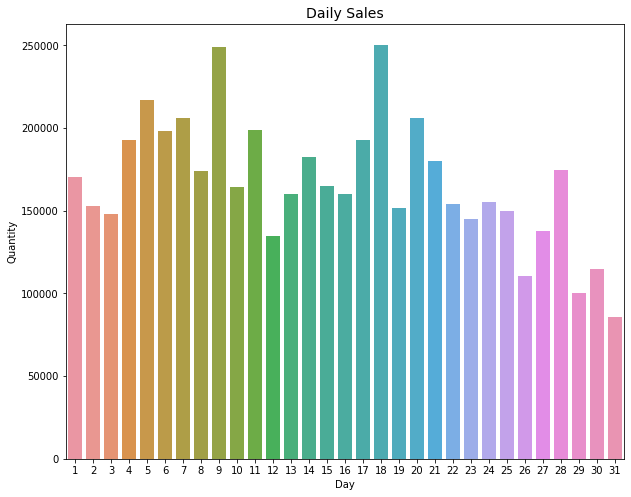

In [29]:
daily_sales = data[['Day', 'Quantity']].groupby('Day').sum()
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)
sns.barplot(daily_sales.index, daily_sales['Quantity'])

- sales are low during month end.

### **Monthly sales**

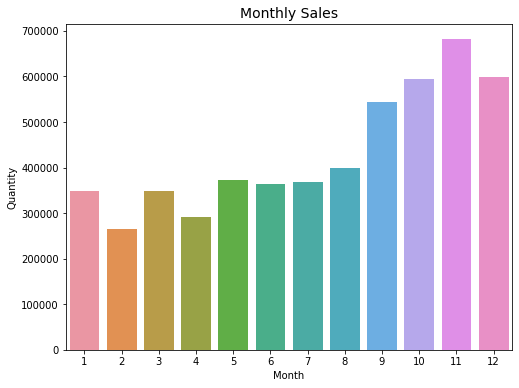

In [30]:
monthly_sales = data[['Month', 'Quantity']].groupby('Month').sum()
plt.figure(figsize=(8,6))
plt.title("Monthly Sales", fontsize=14)
sns.barplot(monthly_sales.index, monthly_sales['Quantity'])

- Sales are gradually increasing as year end approaches.

# **Feature Engineering and Data Cleaning**

In [31]:
#Keep only United Kingdom data
data = data.query("Country=='United Kingdom'").reset_index(drop=True)

In [32]:
#Convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [33]:
#Add new column depicting total amount
data['TotalAmount'] =data['Quantity'] * data['UnitPrice']

Recency, Frequency, and Monetary (RFM) Segmentation

RFM is a behavioural customer segmentation for measuring customer value.

- Receny: How recent was each customer's last purchase

- Frequency: How many times the customer purchased in the last 12 months

- Monetary Value: How much has the customer spent in the last 12 months